In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("loan_data_1.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# Display summary statistics
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       369.000000         363.000000  373.000000        370.000000   
mean       3563.422764        1267.005289  104.914209        340.864865   
std        1427.371257        2388.048316   28.484822         68.549257   
min         150.000000           0.000000    9.000000         12.000000   
25%        2583.000000           0.000000   90.000000        360.000000   
50%        3326.000000         830.000000  110.000000        360.000000   
75%        4226.000000        2008.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      351.000000  
mean         0.837607  
std          0.369338  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [5]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Drop the 'Loan_ID' column
df = df.drop(columns=['Loan_ID'])

In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [9]:
# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

In [10]:
# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [11]:
# Check the distribution of the target variable
df['Loan_Status'].value_counts()

Y    271
N    110
Name: Loan_Status, dtype: int64

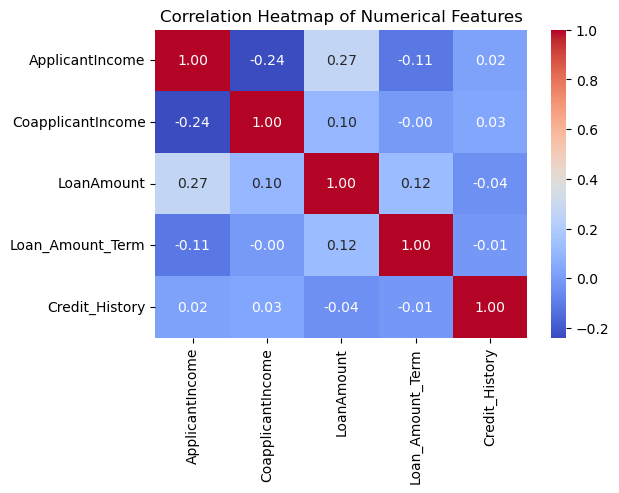

In [38]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

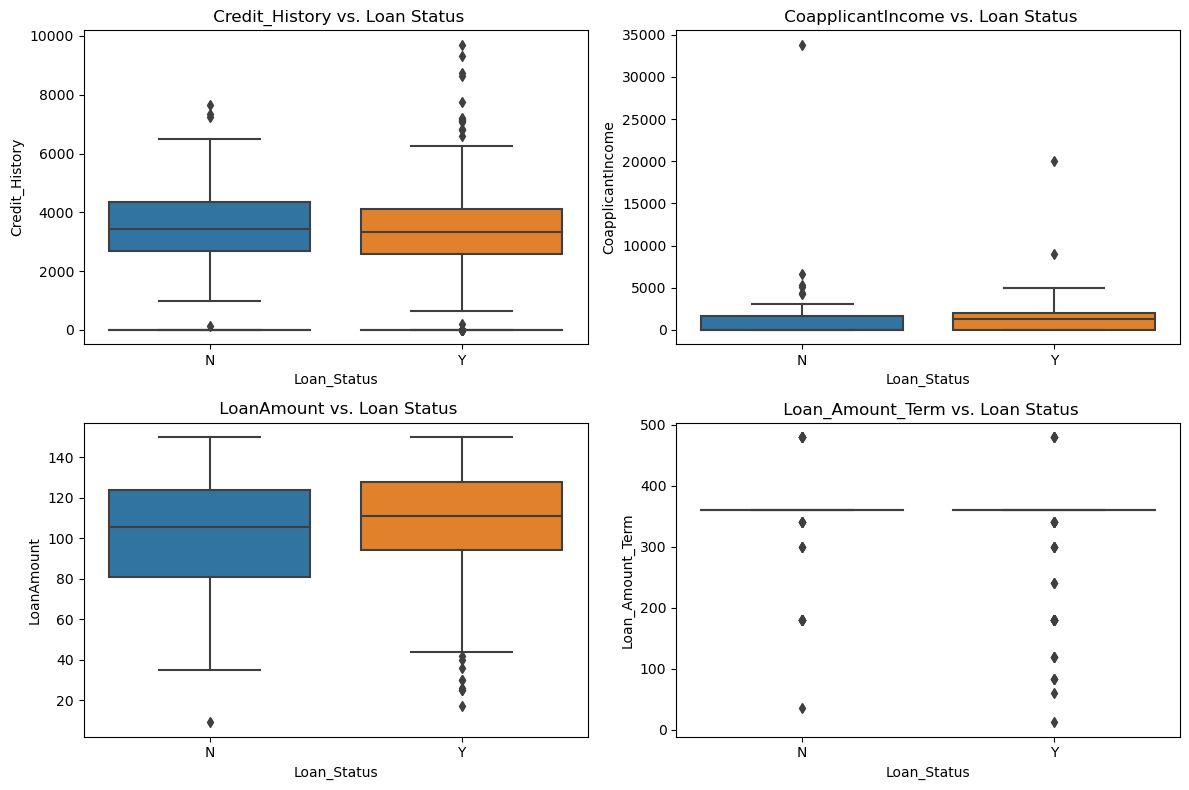

In [21]:
# Plot box plots for target vs. numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i%4+1)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f' {col} vs. Loan Status')
plt.tight_layout()
plt.show()

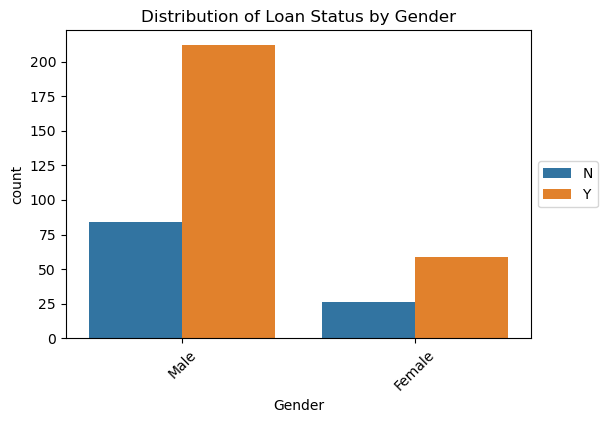

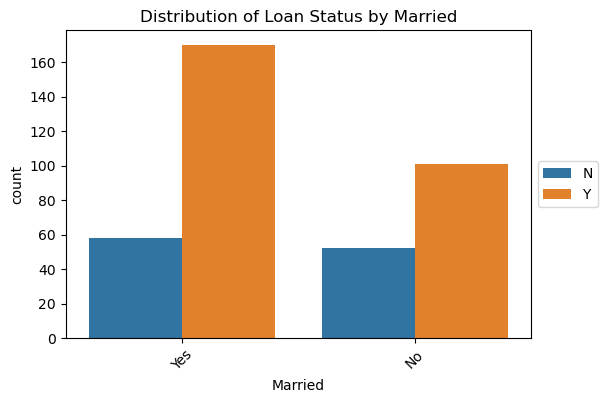

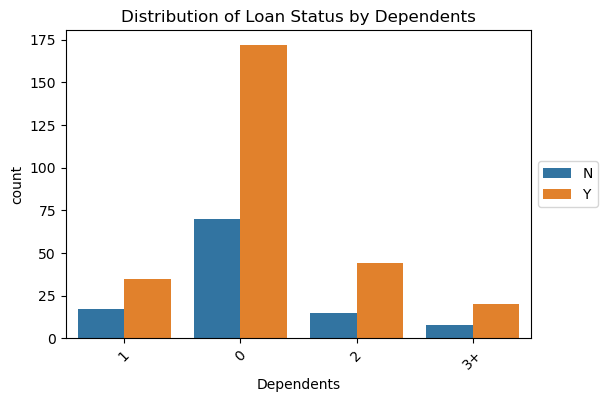

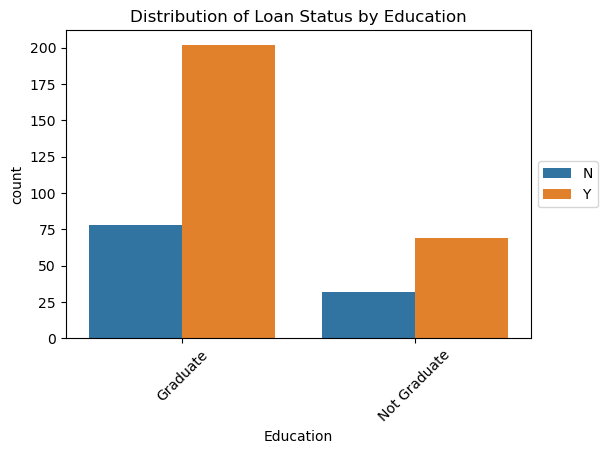

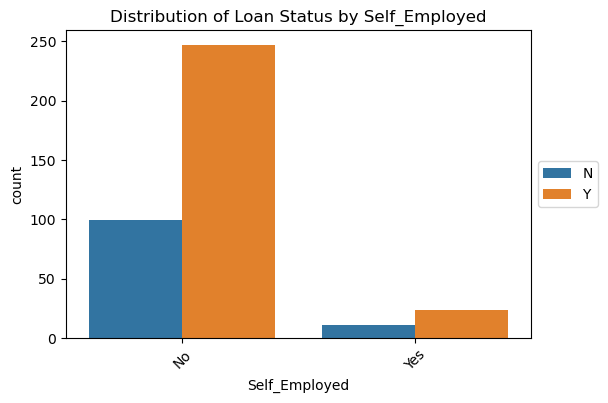

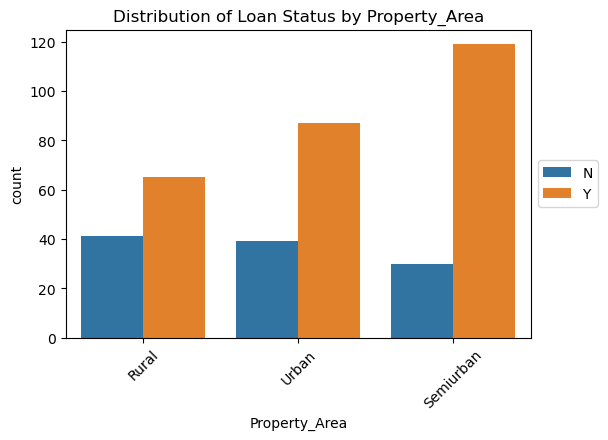

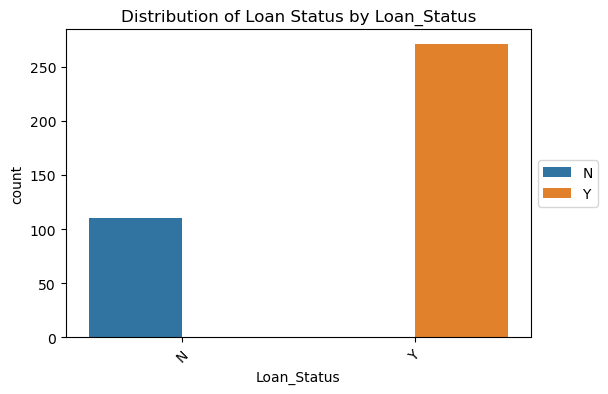

In [24]:
# Explore categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, hue='Loan_Status')
    plt.title(f'Distribution of Loan Status by {col}')
    plt.xticks(rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [25]:
# Feature Engineering
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [26]:
# Split the data into features (X) and target variable (y)
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)

In [30]:
# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
# Evaluate models
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'Support Vector Machine': svm_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8311688311688312
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        21
           1       0.81      1.00      0.90        56

    accuracy                           0.83        77
   macro avg       0.91      0.69      0.72        77
weighted avg       0.86      0.83      0.80        77

Logistic Regression Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77

Support Vector Machine Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.73      1.00      0.84        56

    accuracy                          

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Hyperparameter Tuning (using Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# Final evaluation of the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8311688311688312
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        21
           1       0.81      1.00      0.90        56

    accuracy                           0.83        77
   macro avg       0.91      0.69      0.72        77
weighted avg       0.86      0.83      0.80        77



In [ ]:
# Prediction
# Assuming you have new data stored in a DataFrame called new_data
# You would need to preprocess the new data in the same way as the training data (e.g., one-hot encoding)
# Then, you can use the best model to make predictions
new_data_processed = pd.get_dummies(new_data, drop_first=True)
predictions = best_model.predict(new_data_processed)

In [39]:
# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
for i, idx in enumerate(sorted_idx):
    print(f"Feature {i+1}: {X.columns[idx]} - Importance: {feature_importance[idx]}")


Feature 1: Credit_History - Importance: 0.30594784066331343
Feature 2: ApplicantIncome - Importance: 0.1718750212589933
Feature 3: LoanAmount - Importance: 0.16693617137778144
Feature 4: CoapplicantIncome - Importance: 0.10232992077045722
Feature 5: Loan_Amount_Term - Importance: 0.05458359425268467
Feature 6: Property_Area_Semiurban - Importance: 0.03047729053048558
Feature 7: Property_Area_Urban - Importance: 0.026173629937652272
Feature 8: Married_Yes - Importance: 0.02590101818228207
Feature 9: Gender_Male - Importance: 0.0248551947529985
Feature 10: Dependents_1 - Importance: 0.024154960212490053
Feature 11: Education_Not Graduate - Importance: 0.021132351038973405
Feature 12: Self_Employed_Yes - Importance: 0.01977129270173955
Feature 13: Dependents_2 - Importance: 0.014907924042523878
Feature 14: Dependents_3+ - Importance: 0.01095379027762487


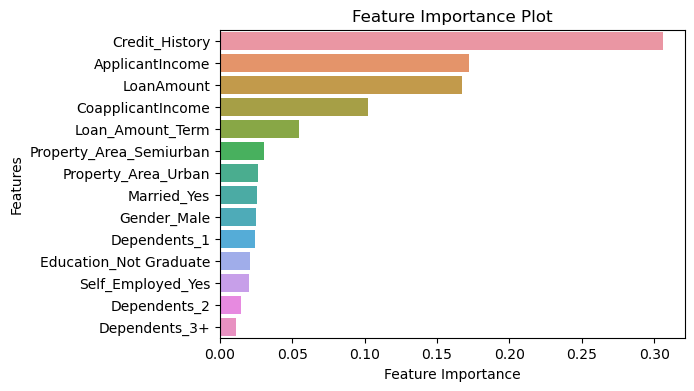

In [41]:
# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


<Figure size 1200x800 with 0 Axes>

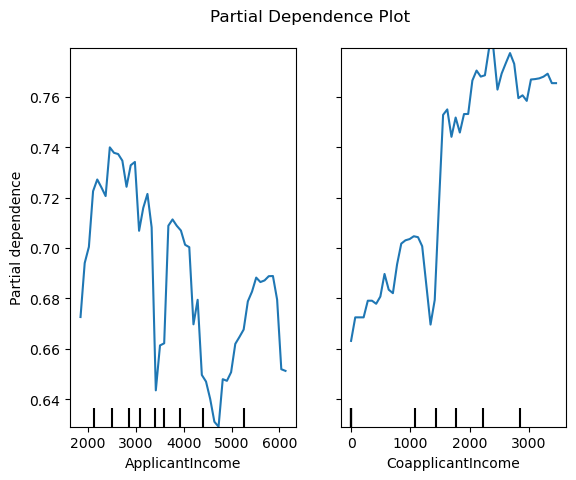

In [45]:
# Partial Dependence Plot (PDP)
from sklearn.inspection import plot_partial_dependence
plt.figure(figsize=(12, 8))
plot_partial_dependence(rf_model, X_train, features=[0, 1], feature_names=X.columns, grid_resolution=50)
plt.suptitle('Partial Dependence Plot')
plt.subplots_adjust(top=0.9)
plt.show()